In [1]:
import numpy as np
import os
import sklearn as sk
import matplotlib as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
from sklearn import tree

In [5]:
model=tree.DecisionTreeClassifier()

In [6]:
model = model.fit(iris.data, iris.target)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

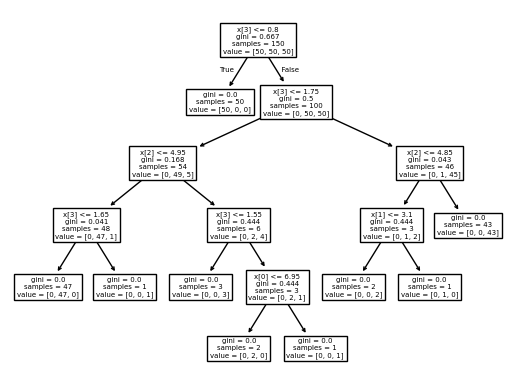

In [7]:
tree.plot_tree(model.fit(iris.data,iris.target))

In [8]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

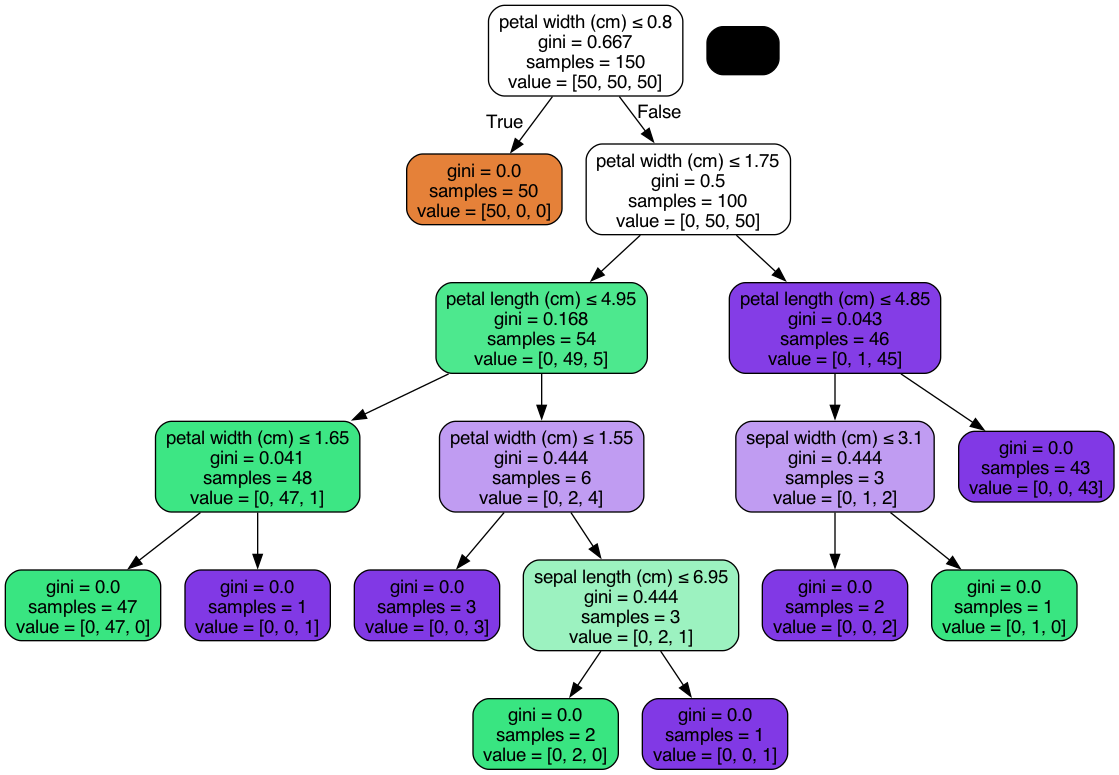

In [9]:
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,
                feature_names=['sepal length (cm)','sepal width (cm)',
                              'petal length (cm)','petal width (cm)'],
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Exporting Tree as PDF**

In [12]:
?tree.export_graphviz

Signature:
tree.export_graphviz(
    decision_tree,
    out_file=None,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=False,
    rounded=False,
    special_characters=False,
    precision=3,
    fontname='helvetica',
)
Docstring:
Export a decision tree in DOT format.

This function generates a GraphViz representation of the decision tree,
which is then written into `out_file`. Once exported, graphical renderings
can be generated using, for example::

    $ dot -Tps tree.dot -o tree.ps      (PostScript format)
    $ dot -Tpng tree.dot -o tree.png    (PNG format)

The sample counts that are shown are weighted with any sample_weights that
might be present.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
decision_tree : object
    The decision tree estimator to be exported to GraphViz.

out_file : object or str, d

In [13]:
import graphviz
dot_data=tree.export_graphviz(model,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

**ANOTHER EXAMPLE**

In [14]:
trainData=np.array([[6,10], [6,9], [1,7], [3,7],[1,5],[4,5],[6,2],[7,2],[8,2],[8,1], [6,7],[7,7],[8,6], [7,5],[6,4],[9,4],[1,2],[2,2],[3,2],[4,2],[2,1],[3,1]])

In [15]:
trainLabels=np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [16]:
testData=np.array([[8,9],[1,5],[6,1],[9,2],[4,7],[9,7],[4,2],[1,1]])

In [17]:
testLabels=np.array([1,1,1,1,0,0,0,0])

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model2=DecisionTreeClassifier()

In [20]:
model2.fit(trainData,trainLabels)

DecisionTreeClassifier()

In [21]:
predictions2=model2.predict(testData)

In [23]:
print(predictions2)

[1. 1. 1. 1. 1. 0. 0. 0.]


In [24]:
print(testLabels)

[1 1 1 1 0 0 0 0]


In [26]:
sum(predictions2==testLabels)/len(predictions2)

np.float64(0.875)

**Printing Tree**

In [27]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

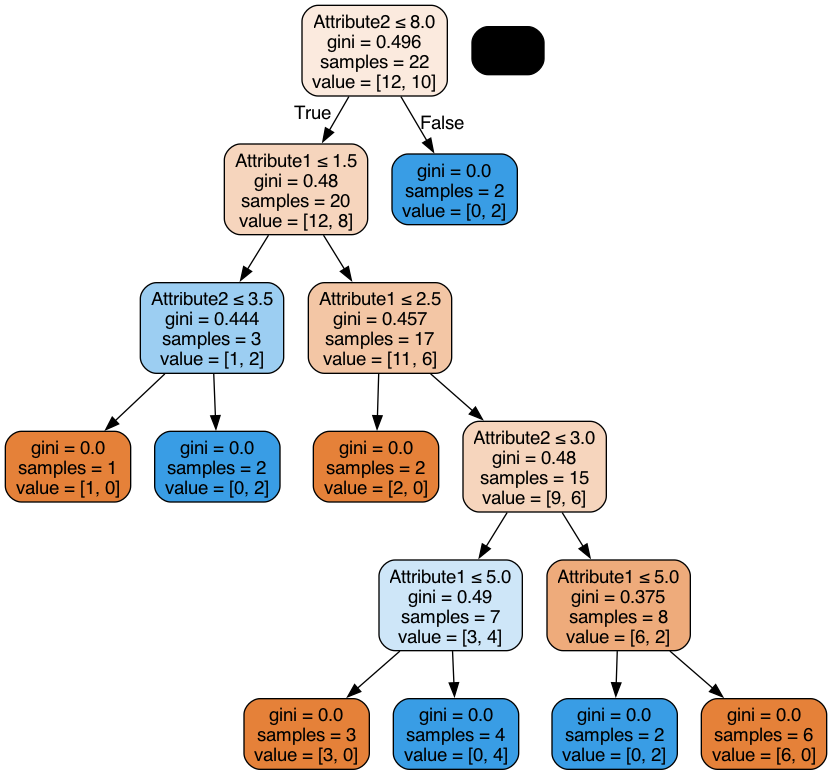

In [28]:
dot_data=StringIO()
export_graphviz(model2,out_file=dot_data,filled=True,rounded=True,feature_names=['Attribute1','Attribute2'],
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())